# Data Exploration 01

A consumer watchdog group wants to see if Netflix has more movies for adults or children.

Using a dataset containing metadata for all of the movies Netflix had available on their platform in 2019, we'll use the MPAA movie rating system to determine if they are correct.

## MPAA Movie Ratings:
* G: All ages admitted.
* PG: Some material may not be suitable for children.
* PG-13: Some material may be inappropriate for children under 13.
* R: Under 17 requires accompanying parent or adult guardian
* NC-17: No One 17 and Under Admitted

Most people would consider G and PG as ratings suitable for children. However, not everyone would agree that a PG-13 movie is necssarily a children's movie. It is up to you to decide how to handle this.

## Part 1: Import Pandas

The `pandas library` is a python library used for data analysis and manipulation. It will provide the core functionality for most of what you do in the data exploration and preprocessing stages of most machine learning projects.

Please see [this Getting Started Guide](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html) for information on the conventional way to import Pandas into your project, as well as other helpful tips for common Pandas tasks.


In [ ]:
# Part 1: Enter the code below to import Pandas according to the
# conventional method.
import pandas as pd

## Part 2: Load the data

The dataset for this exploration is stored at the following url:

[https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/netflix_titles.csv](https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/netflix_titles.csv)

There are lots of ways to load data into your workspace. The easiest way in this case is to [ask Pandas to do it for you](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html).

### Initial Data Analysis
Once you've loaded the data, it's a good idea to poke around a little bit to find out what you're dealing with.

Some questions you might ask include:

* What does the data look like?
* What kind of data is in each column?
* Do any of the columns have missing values?

In [ ]:
# Part 2: Load the dataset into a Pandas dataframe.
data = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/netflix_titles.csv")

In [ ]:
# Then, explore the data by seeing what the first few rows look like.
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [ ]:
# Next, display a technical summary of the data to determine the data types of each column, and which columns have missing data.
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


## Part 3: Filter the Data

Since we're just interested in movies, we'll need to [filter out anything](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html) that isn't a movie for our analysis. The `type` feature contains this information.

Once we have the subset, we should see how many rows it contains. There are a [variety of ways to get the length of a data frame](https://stackoverflow.com/a/38025280/28106).

In [ ]:
# Use pandas's filtering abilitites to select the subset of data
# that represents movies, then calculate how many rows are in the filtered data.
movies = data[data['type'] == 'Movie']
movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
...,...,...,...,...,...,...,...,...,...,...,...,...
5577,80085438,Movie,Frank and Cindy,G.J. Echternkamp,NaN,United States,"April 1, 2016",2007,TV-MA,70 min,Documentaries,Frank was a rising pop star when he married Ci...
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102 min,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88 min,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...
5580,80064521,Movie,Jeremy Scott: The People's Designer,Vlad Yudin,Jeremy Scott,United States,"April 1, 2016",2015,PG-13,109 min,Documentaries,The journey of fashion designer Jeremy Scott f...


### MPAA Ratings
Now that we have only movies, let's get a [quick count of the values being used](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)  in the `rating` feature.

In [ ]:
# Determine the number of records for each value of the "rating" feature.
# Remember to count the values in your subset only, not in the original dataframe.
movies['rating'].value_counts()

TV-MA       1348
TV-14       1038
R            506
TV-PG        432
PG-13        286
NR           202
PG           183
TV-G          80
TV-Y7         69
TV-Y          41
G             36
TV-Y7-FV      27
UR             7
NC-17          2
Name: rating, dtype: int64

### More Filtering

There are apparently some "made for TV" movies in the list that don't fit the
MPAA rating scheme.

Let's [filter some more](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html) to just see movies rated with the standard MPAA ratings of G, PG, PG-13, R, and NC-17.

In [ ]:
# Filter the list of movies to select a new subset containing only movies with
# a standard MPAA rating. Calculate how many rows are in this new set, and
# then see which ratings appear most often.
MPAA_movies = movies.loc[(movies['rating']=='G')| (movies['rating']=='PG') | (movies['rating']=='PG-13') | (movies['rating']=='R') | (movies['rating']=='NC-17')]
print(len(MPAA_movies.index))


1013


6           R
9           R
11          R
21          R
23      PG-13
        ...  
5542    PG-13
5544    PG-13
5546        R
5578        R
5580    PG-13
Name: rating, Length: 1013, dtype: object

## Part 4: Visualization
Now that we have explored and preprocessed our data, let's create a visualization to summarize our findings.

### Exploration vs Presentation
Broadly speaking, there are two types of visualizations:
* Barebones visualizations you might use to get a quick, visual understanding of the data while you're trying to decide how it all fits together.
* Presentation-quality visualizations that you would include in a report or presentation for management or other stakeholders.

### Visualization Tools
There are many different visualization tools availble. In the sections below,
we'll explore the three most common. Each of these libraries has strengths and weaknesses.

It is probably a good idea for you to become familiar with each one, and then become proficient at whichever one you like the best.

### Altair
The Altair visualization library provides a large variety of very easy to use statistical charting tools.

Altair uses a declarative language to build up charts piece by piece.

Assume we have a pandas dataframe called `employees`, with three columns: `name`, `job`, `salary`.

    # Make a box plot style categorical plot showing the distribution of salaries for each job:
    alt.Chart(employees).mark_boxplot().encode(
        x='job',
        y='salary'
    )

    # Make a box plot style categorical plot, and customize the results
    alt.Chart(employees).mark_boxplot().encode(
        alt.X('job', title='Job title'),
        alt.Y('salary', title='Annual salary in thousands of $USD')
    ).properties(
      title='Salaries by Job Title'
    )

Like with Pandas, there is a [conventional way to import Altair](https://altair-viz.github.io/getting_started/starting.html#the-chart-object) into your projects.

In [ ]:
# Import the Altair library the conventional way.
import altair as alt

Let's create a barchart showing the count of each movie rating by using Altair's aggregation capabilities.

In [this example](https://altair-viz.github.io/getting_started/starting.html#data-transformation-aggregation), we see the x axis being set to a feature called `a`, and the y axis set to the `average()` of a feature called `b`.

In our case, we want the x axis to be set to `rating` and the y axis to be the `count()` of `rating`.

In [ ]:
# Use Altair to create a bar chart comparing the count of each movie rating
alt.Chart(MPAA_movies).mark_bar().encode(
    x='rating',
    y = 'count(rating)'
)

alt.Chart(...)


### Seaborn
While Altair uses a "declarative" syntax for building charts piece by piece, the Seaborn library provides a large variety of pre-made charts for common statistical needs.

These charts are divided into different categories. Each category has a high-level interface you can use for simplicity, and then a specific function for each chart that you can use if you need more control over how the chart looks.

Seaborn uses matplotlib for its drawing, and the chart-specific functions each return a matplitlib axes object if you need additional customization.

For example, there are several different types of categorical plots in seaborn: bar plots, box plots, point plots, count plots, swarm plots, etc...

Each of these plots can be accessed using the `catplot` function.

Assume we have a pandas dataframe called `employees`, with three columns: `name`, `job`, `salary`.

    # Make a box plot style categorical plot showing the distribution of salaries for each job:
    sns.catplot(data=employees, x='job', y='salary', kind='box')

    # Make a swarm plot style categorical plot
    sns.catplot(data=employees, x='job', y='salary', kind='swarm')

Alternatively, you can use the plot specific functions to give yourself more control over the output by using matplotlib functions:

    # Make a box plot style categorical plot, and customize the results
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 9))
    ax = sns.boxplot(data=employees, x='job', y='salary')
    ax.set_title("Salaries by Job Title")
    ax.set_ylabel("Annual salary in thousands of $USD")
    ax.set_xlabel("Job title")
    

Like with Pandas, there is a [conventional way to import Seaborn](https://seaborn.pydata.org/tutorial/relational.html) into your projects.

Optionally, you may wish to set some default chart aesthetics by [setting the chart style](https://seaborn.pydata.org/tutorial/aesthetics.html).

In [ ]:
# Import the seaborn library the conventional way. Then optionally configure
# the default chart style.
import seaborn as sns

Since the `rating` column uses categorical data, we need to use Seaborn's [categorical visualizations](https://seaborn.pydata.org/tutorial/categorical.html).

In particular, we want a "count plot" that will display a count of movie ratings.



<Axes: xlabel='rating', ylabel='count'>

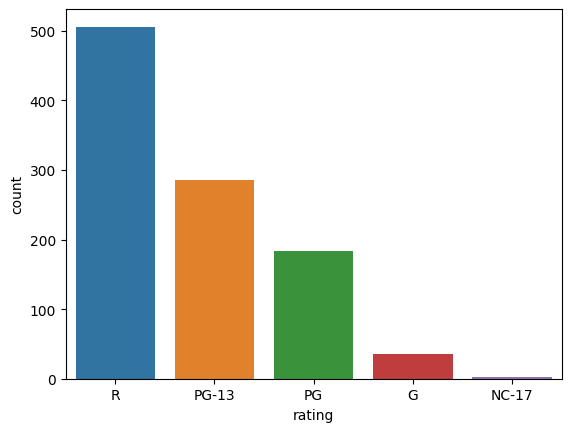

In [ ]:
# Use seaborn to create a count plot comparing the count of each movie rating
sns.countplot(MPAA_movies, x='rating')

### Pandas built-in plotting
In addition to libraries like Altair and Seaborn, Pandas has some [built in charting functionality](https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html).

While not as sophisticated as some of the other options, it is often good enough for quick visualizations.

Just like with seaborn's plotting functions, the pandas plotting functions return matplotlib axes objects, which can be further customized.

Assume we have a pandas dataframe called `employees`, with three columns: `name`, `job`, `salary`.

    # Make a box plot style categorical plot showing the distribution of salaries for each job:
    employees[ ['job','salary'] ].plot.box()

    # Make a box plot style categorical plot, and customize the results
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 9))
    ax = employees[ ['job','salary'] ].plot().box()
    ax.set_title("Salaries by Job Title")
    ax.set_ylabel("Annual salary in thousands of $USD")
    ax.set_xlabel("Job title")


<Axes: >

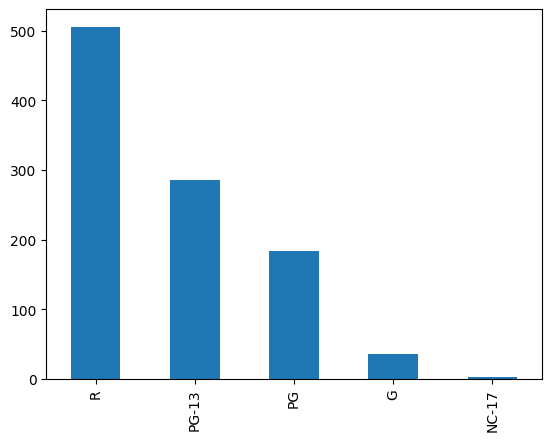

In [ ]:
# Use pandas' built in plotting functions to create a count plot comparing the count of each movie rating
# This will be a little trickier than the other libraries, but one hint is that the pandas value_counts() function
# actually returns a dataframe.
MPAA_movies['rating'].value_counts().plot.bar()

# Part 5: Interpretation and Conclusions

Now that you've seen the data, what is your conclusion? Is the watchdog group
correct that Netflix has more movies for adults than for children? Are there any
caveats you'd include in your analysis?

Write your summary here:

It depends on how we define "adult" movies. If PG-13 movies are adult, then that would be correct because it would total at around 800 adult movies. If PG-13 is for children, then there are barely more children's movies.
A caveat I would add is that this data only includes the MPAA ratings. Many children's movies go through TV instead of theaters and are thus not included.


## 🌟 Above and Beyond 🌟

After reviewing your findings, the watchdog group would like some additional questions answered:

1. How are things affected if you include the "made for TV movies" that have been assigned [TV ratings](https://en.wikipedia.org/wiki/Television_content_rating_system#United_States) in your analysis, but still exclude unrated movies?


<Axes: xlabel='rating', ylabel='count'>

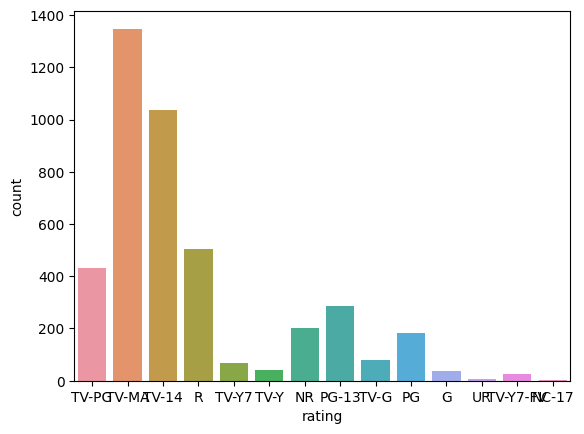

In [ ]:
sns.countplot(movies, x='rating')

2. They would also like to see a separate report that includes only TV shows.

<Axes: >

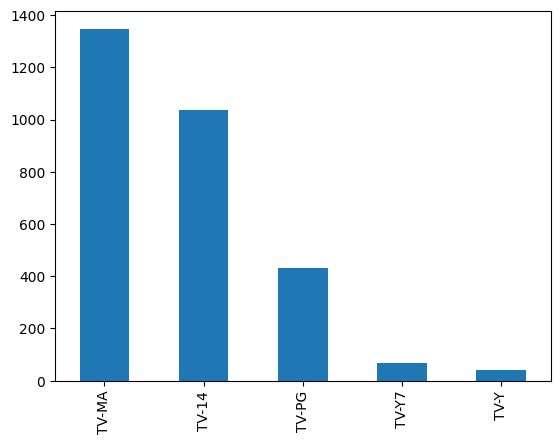

In [ ]:
TV_ratings = ['TV-PG', 'TV-MA', 'TV-14', 'TV-Y7', 'TV-Y']

# Create a new dataframe containing only movies whose ratings are in that list
TV_movies = movies[ movies['rating'].isin(TV_ratings) ]
TV_movies['rating'].value_counts()
TV_movies['rating'].value_counts().plot.bar()

3. For an upcoming community meeting, the group would like to present a simple
chart showing "For Kids" and "For Adults" categories. The easiest way to accomplish this would be to [create a new column in your data frame that maps](https://pandas.pydata.org/docs/getting_started/intro_tutorials/10_text_data.html) each rating to the appropriate "For Kids" or "For Adults" label, then create a new visualization based on that column.

For Adults    3504
For Kids       761
Name: appropriate, dtype: int64


<ipython-input-57-6938098f7e0e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['appropriate'] = np.where(movies['rating'].isin(kid_ratings),"For Kids", "For Adults")


<Axes: >

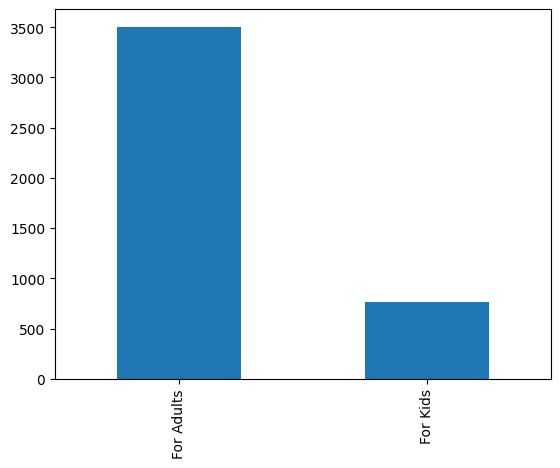

In [ ]:
import numpy as np

kid_ratings = ['G', 'PG', 'TV-PG', 'TV-Y7', 'TV-Y']

movies['appropriate'] = np.where(movies['rating'].isin(kid_ratings),"For Kids", "For Adults")
print(movies['appropriate'].value_counts())
movies['appropriate'].value_counts().plot.bar()

